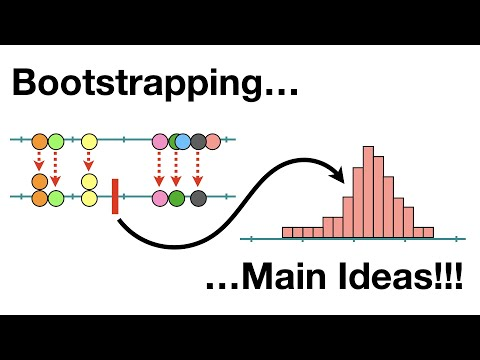

In [1]:
# Q1：（1）
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Q1：（2）What is bootstrapping?
 Bootstrap is a statistical resampling method. It is a method of mathematical computation by repeated sampling from the original data set with put-back. Its sample size must be the same as the original dataset and needs to be repeated several times to generate a distribution of statistical data. This saves time in collecting new data and achieves the objective by secondary research on the original data. 


(3)standard deviation & standard error of the mean
 standard deviation and standard error of the mean are used for different purposes. standard deviation is used to describe how far each data point is from the mean of the data. Standard error of the mean is a measure of how far the mean of a sample of data deviates from the actual value of the data as a whole. One of them describes the distribution of the data and the other describes the level of confidence in the means.
 
 summary by chatgpt：
 We discussed the differences between standard deviation (SD) and standard error of the mean (SEM), where SD measures the spread of data around the mean without depending on sample size, while SEM reflects the precision of the sample mean as an estimate of the population mean and decreases with larger sample sizes. We also covered bootstrapping, a resampling technique that involves creating multiple simulated samples from an original dataset (with replacement) to estimate the distribution of a statistic without strong distributional assumptions, allowing for the calculation of confidence intervals and hypothesis testing. Bootstrapping is advantageous due to its flexibility and minimal assumptions but can be computationally intensive and relies on the sample being representative.
 link：https://chatgpt.com/share/66ff1923-3a00-8005-ab29-56a145a34392

Q2：
1.First we need to start with a random sample of the original data with put-back, with the same sample size as the original data. This can be stopped after obtaining 1000 new samples.
2.Next, we need to ask for the sample means of these one thousand samples, which I will denote in order as x1, x2, x3 ......
3.The third step requires the 1000 means obtained in the second step to be used as a sample for the calculation of means.I'll write down the mean value I get this time as x0
4.Next, in order to get the strandard error of the mean, it is necessary to calculate a new squared deviation by substituting the previously calculated values of x1, x2, x3, etc. and x0 into the formula for calculating the standard deviation.
5.Finally, by combining the formula x0+-(2*=SE) with the data, we can create a 95% confidence interval.

Q3：
The first two variables are set to define how many times the function needs to be repeated and the sample size of the original sample. Next, create some blank vectors with the np.zero() statement. Then an initial random value is set with the np.random.seed() statement, which ensures that the same result is obtained every time the function is re-run. Next, use np.random.choice to sample from the original data; replace needs to be set to true. then use sample.mean to calculate the mean of each sampling result. Finally, np.quantile is used to find the confidence interval I need to ask for.

95% Bootstrap Confidence Interval for the Population Mean: (5.237500000000001, 5.8875)


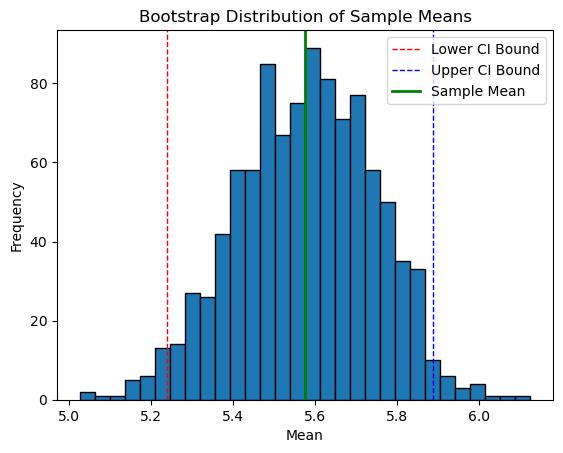

In [2]:
#Q4：（1）
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the bootstrap confidence interval for a given statistic
def bootstrap_ci(data, statistic_function, num_bootstrap_samples=1000, confidence_level=0.95):
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, (num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the statistic for each bootstrap sample
    bootstrap_statistics = np.array([statistic_function(sample) for sample in bootstrap_samples])
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_statistics, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Sample data (replace this with your actual sample data)
sample_data = np.array([5.1, 5.5, 4.8, 6.2, 5.7, 6.1, 5.9, 5.3])

# Calculate the 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample_data, np.mean)

print("95% Bootstrap Confidence Interval for the Population Mean:", mean_ci)

# Visualization of bootstrap statistics
plt.hist([np.mean(np.random.choice(sample_data, len(sample_data), replace=True)) for _ in range(1000)], bins=30, edgecolor='black')
plt.axvline(mean_ci[0], color='red', linestyle='dashed', linewidth=1, label='Lower CI Bound')
plt.axvline(mean_ci[1], color='blue', linestyle='dashed', linewidth=1, label='Upper CI Bound')
plt.axvline(np.mean(sample_data), color='green', linestyle='solid', linewidth=2, label='Sample Mean')
plt.title("Bootstrap Distribution of Sample Means")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()


95% Bootstrap Confidence Interval for the Population Median: (5.1, 6.0)


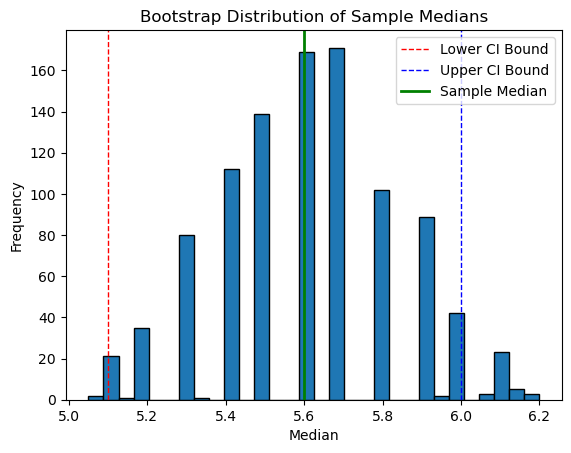

In [3]:
# Q:(4)
# If I want to change the parameter, I just need to make a change to this line of code 
# mean_ci = bootstrap_ci(sample_data, np.mean)
# and change the corresponding variable name
# For example：  change np.ean into np.median
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_ci(data, statistic_function, num_bootstrap_samples=1000, confidence_level=0.95):

    bootstrap_samples = np.random.choice(data, (num_bootstrap_samples, len(data)), replace=True)
    
    bootstrap_statistics = np.array([statistic_function(sample) for sample in bootstrap_samples])
    
    lower_bound = np.percentile(bootstrap_statistics, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_statistics, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

sample_data = np.array([5.1, 5.5, 4.8, 6.2, 5.7, 6.1, 5.9, 5.3])

median_ci = bootstrap_ci(sample_data, np.median)

print("95% Bootstrap Confidence Interval for the Population Median:", median_ci)

plt.hist([np.median(np.random.choice(sample_data, len(sample_data), replace=True)) for _ in range(1000)], bins=30, edgecolor='black')
plt.axvline(median_ci[0], color='red', linestyle='dashed', linewidth=1, label='Lower CI Bound')
plt.axvline(median_ci[1], color='blue', linestyle='dashed', linewidth=1, label='Upper CI Bound')
plt.axvline(np.median(sample_data), color='green', linestyle='solid', linewidth=2, label='Sample Median')
plt.title("Bootstrap Distribution of Sample Medians")
plt.xlabel("Median")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# link: https://chatgpt.com/share/66ff3f80-122c-8005-a244-6f33515cbe5f

Q5:
Because these two concepts are completely different, the popualation parameter is real, but a value that we can't accurately calculate. sample statistic is the data from the sample we sampled, and it is possible to calculate a specific value. To get a true picture of the whole, we use the data from the sample to predict the whole. However, because of the random nature of sampling, the sample often deviates from the true situation, which leads to deviations from the true situation when we use the sample to estimate the whole. Confidence intervals are values that we use to measure whether the sample data error is within acceptable limits.

Summary by chatbot：
In constructing confidence intervals, it's important to distinguish between the population parameter (a fixed, unknown value) and the sample statistic (a variable, known value from a sample). The confidence interval uses the sample statistic to estimate the range where the true population parameter likely falls, accounting for sampling variability. The interval is designed so that over repeated sampling, a certain percentage (e.g., 95%) of intervals will contain the true population parameter, helping to make inferences about the population while acknowledging uncertainty.

link：https://chatgpt.com/share/66ff427a-6380-8005-9639-2edc8aa15322


Q6：
（1）：What is the process of bootstrapping?

 The main process of bootstrapping is to continually take a large sample of an existing sample that can be put back, with the new sample size remaining the same as the original sample. This is a form of data collection.

（2）：What is the main purpose of bootstrapping?

 It has two main purposes, one is for obtaining a larger sample of data to reduce statistical error. The second is that existing data can be used to generate new samples, saving time in investigating new data.

（3）：If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

 If I want to judge whether the prediction I made is credible or not, then I need to find the confidence interval for this parameter. We can do this by bootstrapping, generating thousands of samples, and then analysing these samples to get their respective parameters. By analysing the dispersion of their parameters, we can determine the range within which a parameter can reasonably exist. This range is the confidence interval. As long as the prediction is within this range, its error is considered acceptable. It also means that the prediction is a relatively accurate prediction.


Q7：
（1）：This is because a confidence interval means that there is a high probability that the parameter will be correct as long as it is in this interval. Whereas a hypothesis test can only result in yes or no. Because 0 is in the confidence interval, when we assume 0 as the outcome, we must assume that it is a reasonable outcome, even if the data has been clearly realistic that the outcome is not 0.

（2）：This is because if the hypothesis is wrong, then the correct interval cannot contain the value of the hypothesis,. Since the confidence interval now contains 0, we don't have enough evidence that the confidence interval we derived is correct.

Q8：(1)The population mean of the difference between final health and initial health scores is what we first designate as μd. When μd equals zero, the vaccination is considered ineffective (H0); when μd does not equal zero, the vaccine is considered effective (Ha).

Score Differences: 0    2
1    8
2   -3
3    5
4    3
5    6
6    7
7   -3
8    7
9    1
dtype: int64
95% Bootstrap Confidence Interval for the Mean Difference in Health Scores: (0.8975000000000023, 5.5)


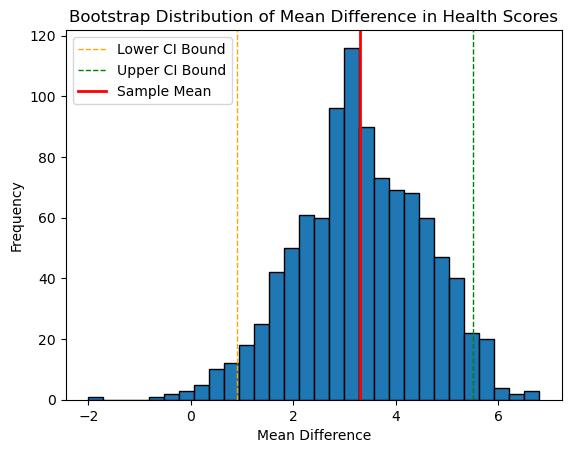

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create DataFrame with patient data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)
score_diff = df['FinalHealthScore'] - df['InitialHealthScore']
print("Score Differences:", score_diff)

def bootstrap_ci(score_diff, statistic_function, num_bs_samples=1000, confidence_level=0.95):
    bs_samples = np.random.choice(score_diff, (num_bs_samples, len(score_diff)), replace=True)
    bs_statistics = np.array([statistic_function(sample) for sample in bs_samples])
    lower_bound = np.percentile(bs_statistics, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bs_statistics, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

mean_diff_ci = bootstrap_ci(score_diff, np.mean)
print("95% Bootstrap Confidence Interval for the Mean Difference in Health Scores:", mean_diff_ci)

plt.hist([np.mean(np.random.choice(score_diff, len(score_diff), replace=True)) for _ in range(1000)], bins=30, edgecolor='black')
plt.axvline(mean_diff_ci[0], color='orange', linestyle='dashed', linewidth=1, label='Lower CI Bound')
plt.axvline(mean_diff_ci[1], color='green', linestyle='dashed', linewidth=1, label='Upper CI Bound')
plt.axvline(np.mean(score_diff), color='red', linestyle='solid', linewidth=2, label='Sample Mean')
plt.title("Bootstrap Distribution of Mean Difference in Health Scores")
plt.xlabel("Mean Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Q8.(3):
I have come to the conclusion that the vaccine works. Because the confidence interval I obtained does not include the presence of 0, it is fail to rejuct H0. This gives me enough evidence that Ha is correct. It is also possible to conclude that the vaccine is effective.

Q9：Mostly